# Step 1 - Brief description of the problem and data

In this project, I will be creating an algorithm to identify metastatic cancer in small image patches taken from larger digital pathology scans as described on the [Histopathologic Cancer Detection Kaggle project page](https://www.kaggle.com/c/histopathologic-cancer-detection/overview).  

The data includes 220,025 image files named with an image `id` and a `.tif` suffix.  These image files are 96x96 pixels with an RGB color space.

It also includes a `train_labels.csv` file with 2 columns; 
1. `id`: The same id used for the image file name.  For example, the training file `0a0a2e923bdedb11f270dcd3f11d0f001df98f00.tif` corresponds to the row in the CSV file with that same number in the `id` column.
2. `label`: 0 = does not contain metastatic cancer tissue.  1 = contains metastatic cancer tissue. 


# Part 2 - Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

Show a few visualizations like histograms. Describe any data cleaning procedures. Based on your EDA, what is your plan of analysis? 

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_dir = '/kaggle/input/histopathologic-cancer-detection/train/'
# test_dir = '/kaggle/input/histopathologic-cancer-detection/test/'
# labels = pd.read_csv('/kaggle/input/histopathologic-cancer-detection/train_labels.csv')

train_dir = '/Users/asnyder/PycharmProjects/deep-learning-week3-cancer-detection/histopathologic-cancer-detection/train/'
test_dir = '/Users/asnyder/PycharmProjects/deep-learning-week3-cancer-detection/histopathologic-cancer-detection/test/'
train_labels = pd.read_csv('~/PycharmProjects/deep-learning-week3-cancer-detection/histopathologic-cancer-detection/train_labels.csv')

In [18]:
# Check for missing values.  If any are found, consider deleting them to clean up the data.
train_labels.isnull().sum()

id       0
label    0
dtype: int64

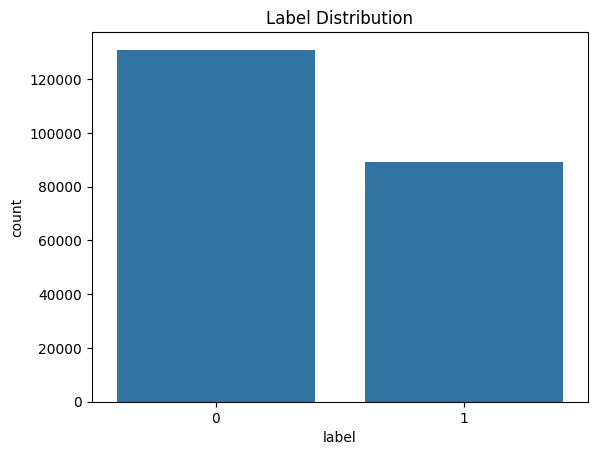

In [19]:
# Look at the distribution of the labels.  Intuitively, an imbalance is expected with many 0's and few 1's because most of the population does not have cancer.  An even distribution would be best for training.
sns.countplot(x='label', data=train_labels)
plt.title('Label Distribution')
plt.show()

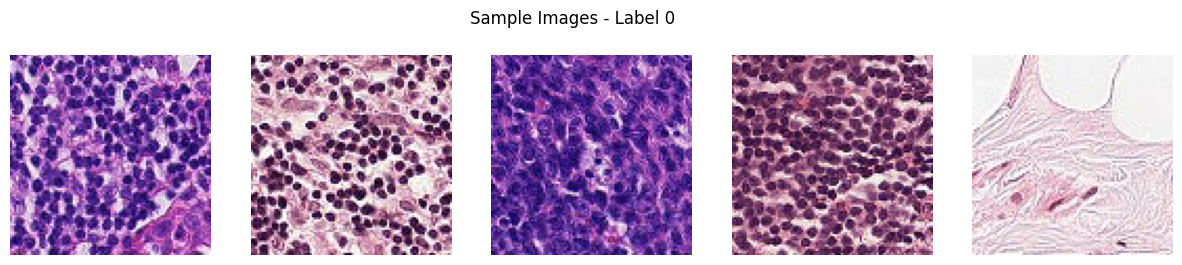

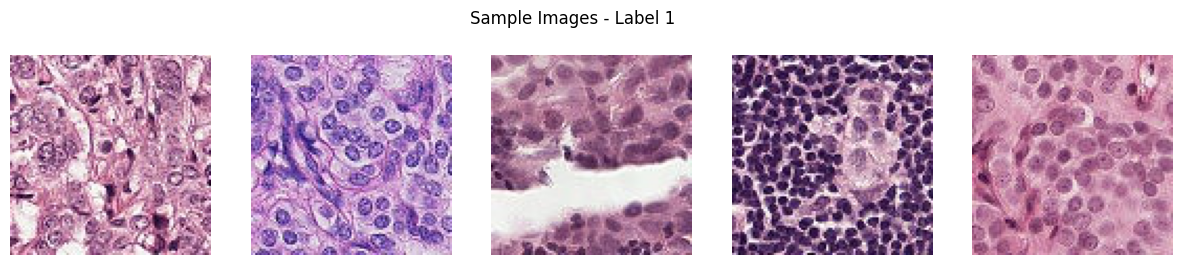

In [20]:
# View a few image examples, including images with a label of 0 and 1.  
def show_samples(label, num_samples=5):
    samples = train_labels[train_labels['label'] == label].sample(num_samples)
    plt.figure(figsize=(15, 3))
    for i, image_id in enumerate(samples['id']):
        img_path = os.path.join(train_dir, image_id + '.tif')
        img = Image.open(img_path)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(f'Sample Images - Label {label}')
    plt.show()

show_samples(label=0)
show_samples(label=1)

    
# Part 3 - Model Architecture

Describe your model architecture and reasoning for why you believe that specific architecture would be suitable for this problem. Compare multiple architectures and tune hyperparameters.

# Part 4 - Results and Analysis 

Run hyperparameter tuning, try different architectures for comparison, apply techniques to improve training or performance, and discuss what helped.

Includes results with tables and figures. There is an analysis of why or why not something worked well, troubleshooting, and a hyperparameter optimization procedure summary.

# Step 5 - Conclusion

Discuss and interpret results as well as learnings and takeaways. What did and did not help improve the performance of your models? What improvements could you try in the future?